In [1]:
"""
This script will make visualizations for relationships between many of the variables in the data from get_clean_data
"""

'\nThis script will make visualizations for relationships between many of the variables in the data from get_clean_data\n'

In [6]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
path = '/Users/leohsu/Desktop/Predict NBA Points Per Game/graphs'

if not os.path.exists(path):
    os.makedirs(path)

In [9]:
#read in csv files to DataFrames
data_path = '/Users/leohsu/Desktop/Predict NBA Points Per Game/data'

df_totals = pd.read_csv(f'{data_path}/df_totals.csv')
df_no_totals = pd.read_csv(f'{data_path}/df_no_totals.csv')

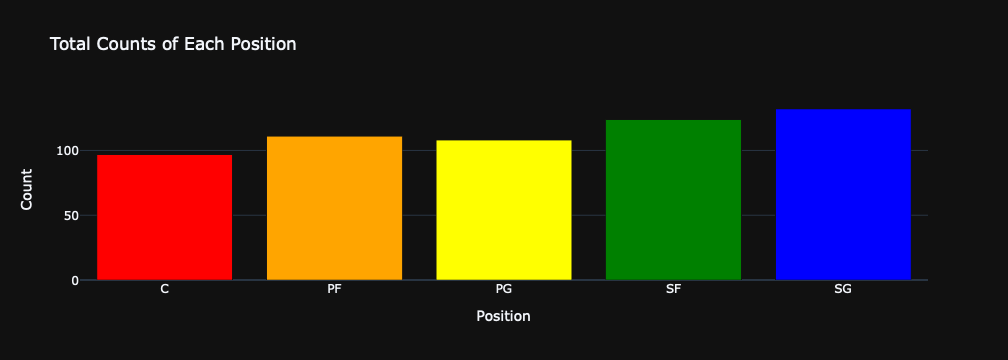

In [10]:
#creates a histogram of the counts of each position

pos_count = df_totals.groupby(['Position']).count()

pos_count_bar = go.Figure()

pos_count_bar.add_trace(go.Bar(x = ['C', 'PF', 'PG', 'SF', 'SG'],
                               y = pos_count['Player'],
                               marker=dict(color=['red', 'orange', 'yellow', 'green', 'blue'])))

pos_count_bar.update_layout(
    title='Total Counts of Each Position',
    xaxis_title='Position',
    yaxis_title='Count',
    template='plotly_dark'
)
pos_count_bar.show()

pos_count_bar.write_image(f'{path}/PositionCounts.png')

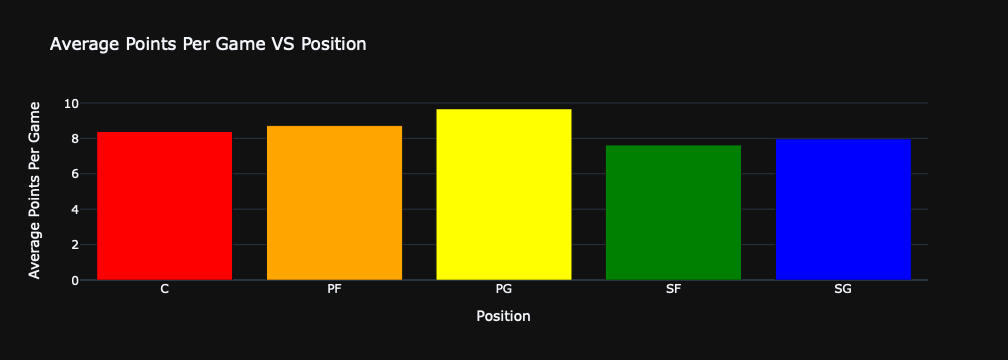

In [11]:
#sorting and preparing for visualization
pos_ppg = df_totals.groupby(by = ['Position']).agg({'Points Per Game' : 'mean'}).reset_index()

pos_ppg_bar = go.Figure()

pos_ppg_bar.add_trace(go.Bar(
    x=pos_ppg['Position'],
    y=pos_ppg['Points Per Game'],
    marker=dict(color=['red', 'orange', 'yellow','green', 'blue'])))

pos_ppg_bar.update_layout(
    title='Average Points Per Game VS Position',
    xaxis_title='Position',
    yaxis_title='Average Points Per Game',
    template='plotly_dark'
)


pos_ppg_bar.show()


pos_ppg_bar.write_image(f'{path}/AveragePointsPerGameVSPositon.png')

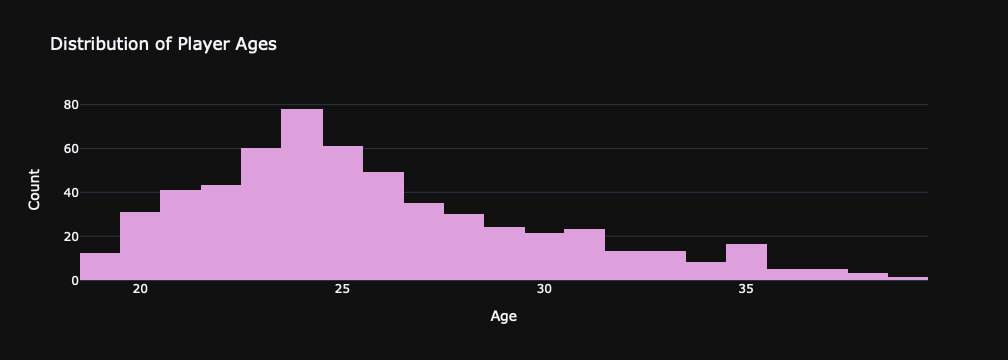

In [12]:
age_hist = go.Figure()

age_hist.add_trace(go.Histogram(x=df_totals['Age'], marker_color = "plum"))

age_hist.update_layout(title = 'Distribution of Player Ages',
                       xaxis_title = 'Age',
                       yaxis_title = 'Count',
                       template = 'plotly_dark')

age_hist.show()

age_hist.write_image(f'{path}/DistributionofPlayerAges.png')

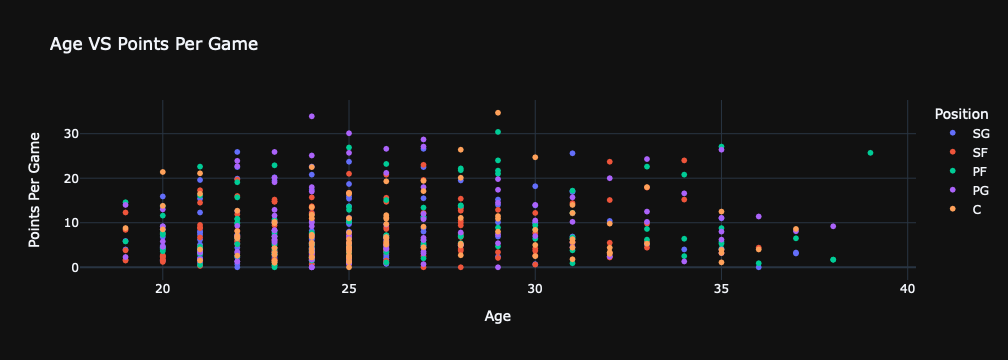

In [13]:
age_ppg_scatter = px.scatter(df_totals, x = 'Age', y = 'Points Per Game', color = 'Position',
                        title = 'Age VS Points Per Game',
                        labels = {'Age': 'Age', 'Points Per Game' : 'Points Per Game'},
                        template = 'plotly_dark')

age_ppg_scatter.show()

age_ppg_scatter.write_image(f'{path}/AgeVSPointsPerGame.png')

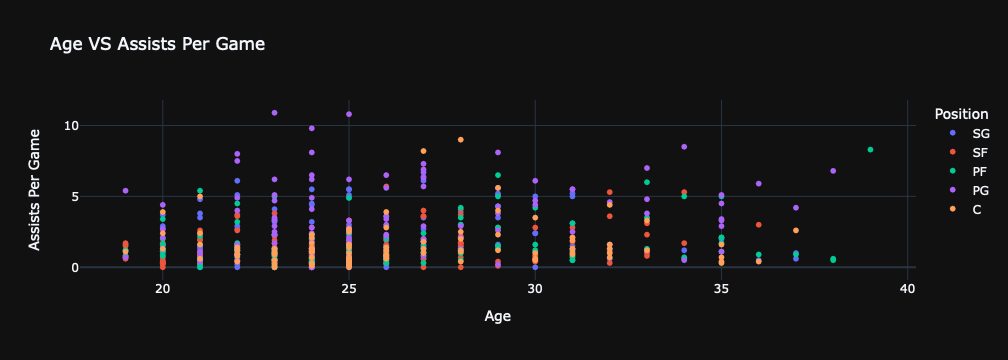

In [14]:
age_apg_scatter = points_age = px.scatter(df_totals, x = 'Age', y = 'Assists Per Game', color = 'Position',
                        title = 'Age VS Assists Per Game',
                        labels = {'Age': 'Age', 'Assists Per Game' : 'Assists Per Game'},
                        template = 'plotly_dark')

age_apg_scatter.show()

age_apg_scatter.write_image(f'{path}/AgeVSAssistsPerGame.png')

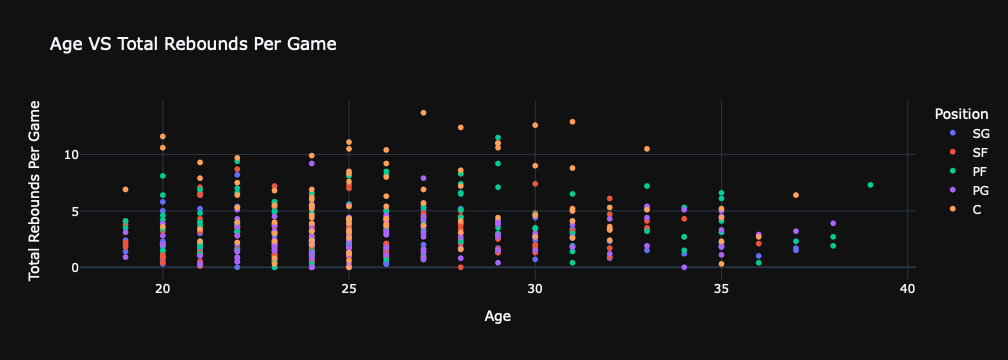

In [15]:
age_trb_scatter = points_age = px.scatter(df_totals, x = 'Age', y = 'Total Rebounds Per Game', color = 'Position',
                        title = 'Age VS Total Rebounds Per Game',
                        labels = {'Age': 'Age', 'Total Rebounds Per Game' : 'Total Rebounds Per Game'},
                        template = 'plotly_dark')

age_trb_scatter.show()

age_trb_scatter.write_image(f'{path}/AgeVSTotalReboundsPerGame.png')

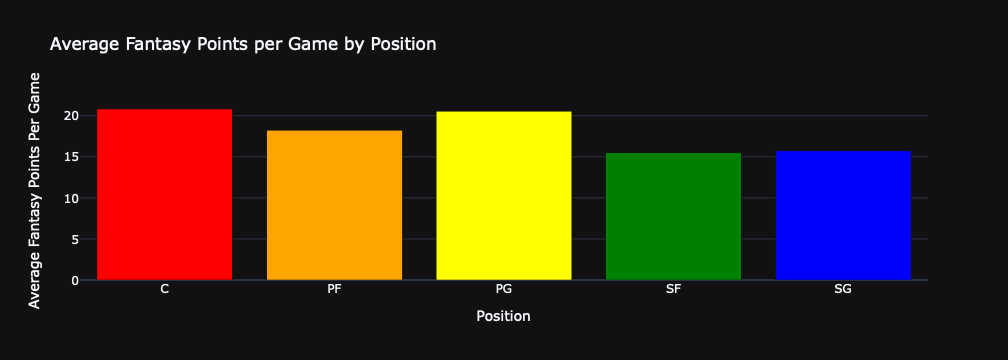

In [16]:
#sorting and preping for visualization again
pos_fpts = df_totals.groupby('Position').agg({'Average Fantasy Points Per Game':'mean'}).reset_index()

pos_fpts_bar = go.Figure()

pos_fpts_bar.add_trace(go.Bar(x = pos_fpts['Position'],
                              y = pos_fpts['Average Fantasy Points Per Game'],
                              marker=dict(color=['red', 'orange', 'yellow','green', 'blue'])))

pos_fpts_bar.update_layout(title = 'Average Fantasy Points per Game by Position',
                           xaxis_title = 'Position',
                           yaxis_title = 'Average Fantasy Points Per Game',
                           template = 'plotly_dark')

pos_fpts_bar.show()

pos_fpts_bar.write_image(f'{path}/AverageFantasyPointsPerGame.png')

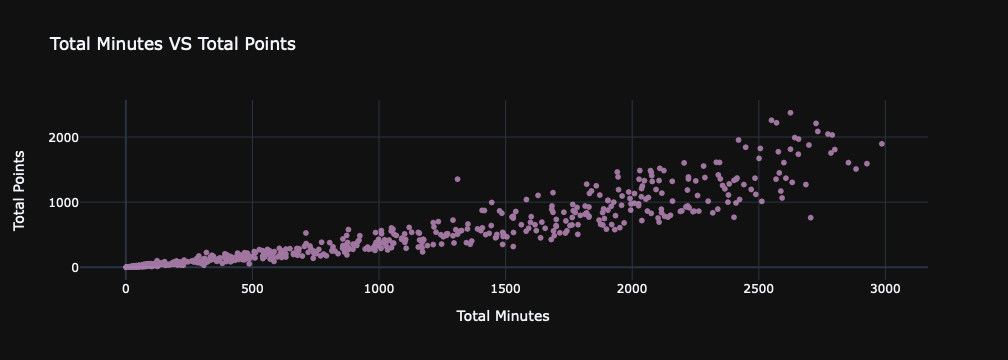

In [17]:
mins_pts_scatter = go.Figure()

mins_pts_scatter.add_trace(go.Scatter(x=df_totals['Total Minutes'], y=df_totals['Total Points'],
                                               mode='markers', marker_color='plum', opacity=0.7))

mins_pts_scatter.update_layout(title = 'Total Minutes VS Total Points',
                           xaxis_title = 'Total Minutes',
                           yaxis_title = 'Total Points',
                           template = 'plotly_dark')

mins_pts_scatter.show()

mins_pts_scatter.write_image(f'{path}/TotalMinutesVSTotalPoints.png')

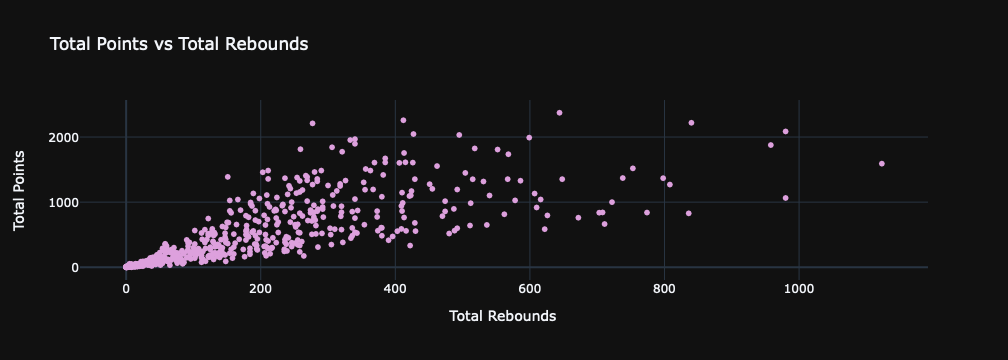

In [18]:
rbds_pts_scatter = px.scatter(df_totals, x='Total Rebounds', y='Total Points',
                         title='Total Points vs Total Rebounds',
                         labels={'Total Rebounds': 'Total Rebounds', 'Total Points': 'Total Points'},
                         template='plotly_dark',
                         color_discrete_sequence=['plum'])
rbds_pts_scatter.show()

rbds_pts_scatter.write_image(f'{path}/TotalPointsVSTotalRebounds.png')

In [19]:
#grouping by team to do team visualizations
team_stats = df_no_totals.groupby('Team').mean().reset_index()

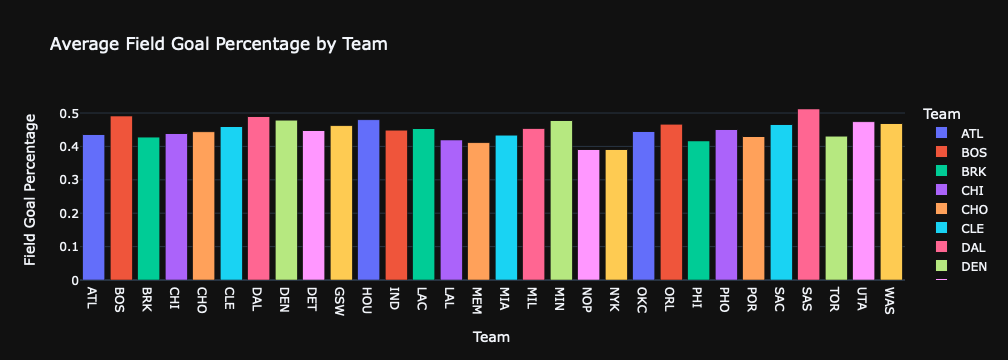

In [20]:
team_fgpct_bar = px.bar(team_stats, x='Team', y='Field Goal Percentage', title='Average Field Goal Percentage by Team', color='Team', template='plotly_dark')
team_fgpct_bar.show()

team_fgpct_bar.write_image(f'{path}/AverageFieldGoalPercentagebyTeam.png')

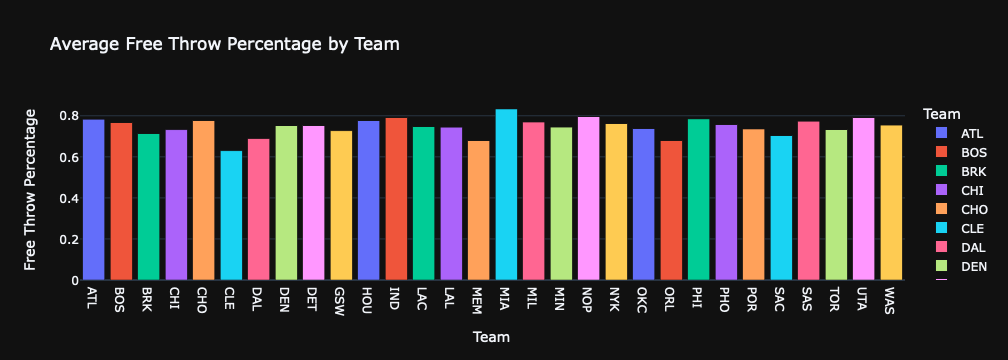

In [21]:
team_ftpct_bar = px.bar(team_stats, x='Team', y='Free Throw Percentage', title='Average Free Throw Percentage by Team', color='Team', template='plotly_dark')
team_ftpct_bar.show()

team_ftpct_bar.write_image(f'{path}/AverageFreeThrowPercentagebyTeam.png')

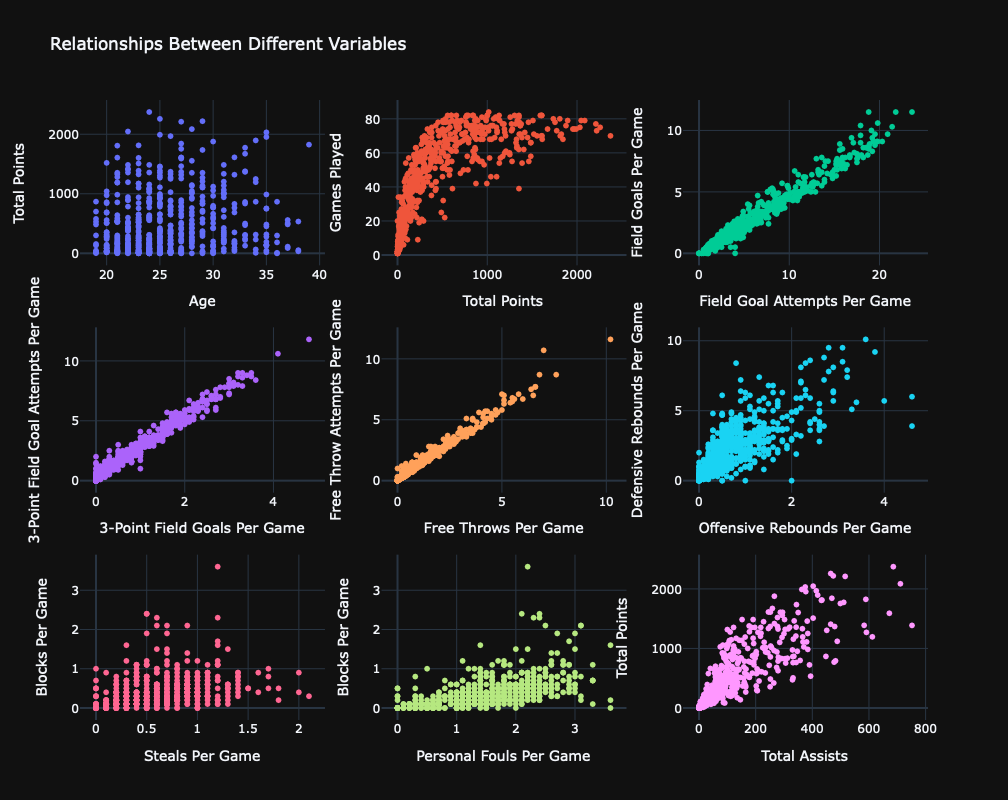

In [22]:
#crete a list of tuples of the variables we want to create visulizations of the relationships between
var_relationships = [
    ('Age', 'Total Points'),
    ('Total Points', 'Games Played'),
    ('Field Goal Attempts Per Game', 'Field Goals Per Game'),
    ('3-Point Field Goals Per Game', '3-Point Field Goal Attempts Per Game'),
    ('Free Throws Per Game', 'Free Throw Attempts Per Game'),
    ('Offensive Rebounds Per Game', 'Defensive Rebounds Per Game'),
    ('Steals Per Game', 'Blocks Per Game'),
    ('Personal Fouls Per Game', 'Blocks Per Game'),
    ('Total Assists', 'Total Points')
]

var_relationships_scatter = make_subplots(rows=3, cols=3)

#determines which column in the matrix of sub_plots to fill in with the data from var_relationships
for idx, (x_col, y_col) in enumerate(var_relationships, start=1):
    row = (idx - 1) // 3 + 1
    col = (idx - 1) % 3 + 1
    var_relationships_scatter.add_trace(go.Scatter(x=df_totals[x_col], y=df_totals[y_col], 
                                        mode='markers'), row=row, col=col)
    var_relationships_scatter.update_xaxes(title_text=x_col, row=row, col=col)
    var_relationships_scatter.update_yaxes(title_text=y_col, row=row, col=col)

var_relationships_scatter.update_layout(
    title_text='Relationships Between Different Variables',
    height=800,
    width=1000,
    template='plotly_dark'
)

var_relationships_scatter.update_layout(showlegend=False)

var_relationships_scatter.show()


var_relationships_scatter.write_image(f'{path}/RelationshipsBetweenDifferentVariables.png')

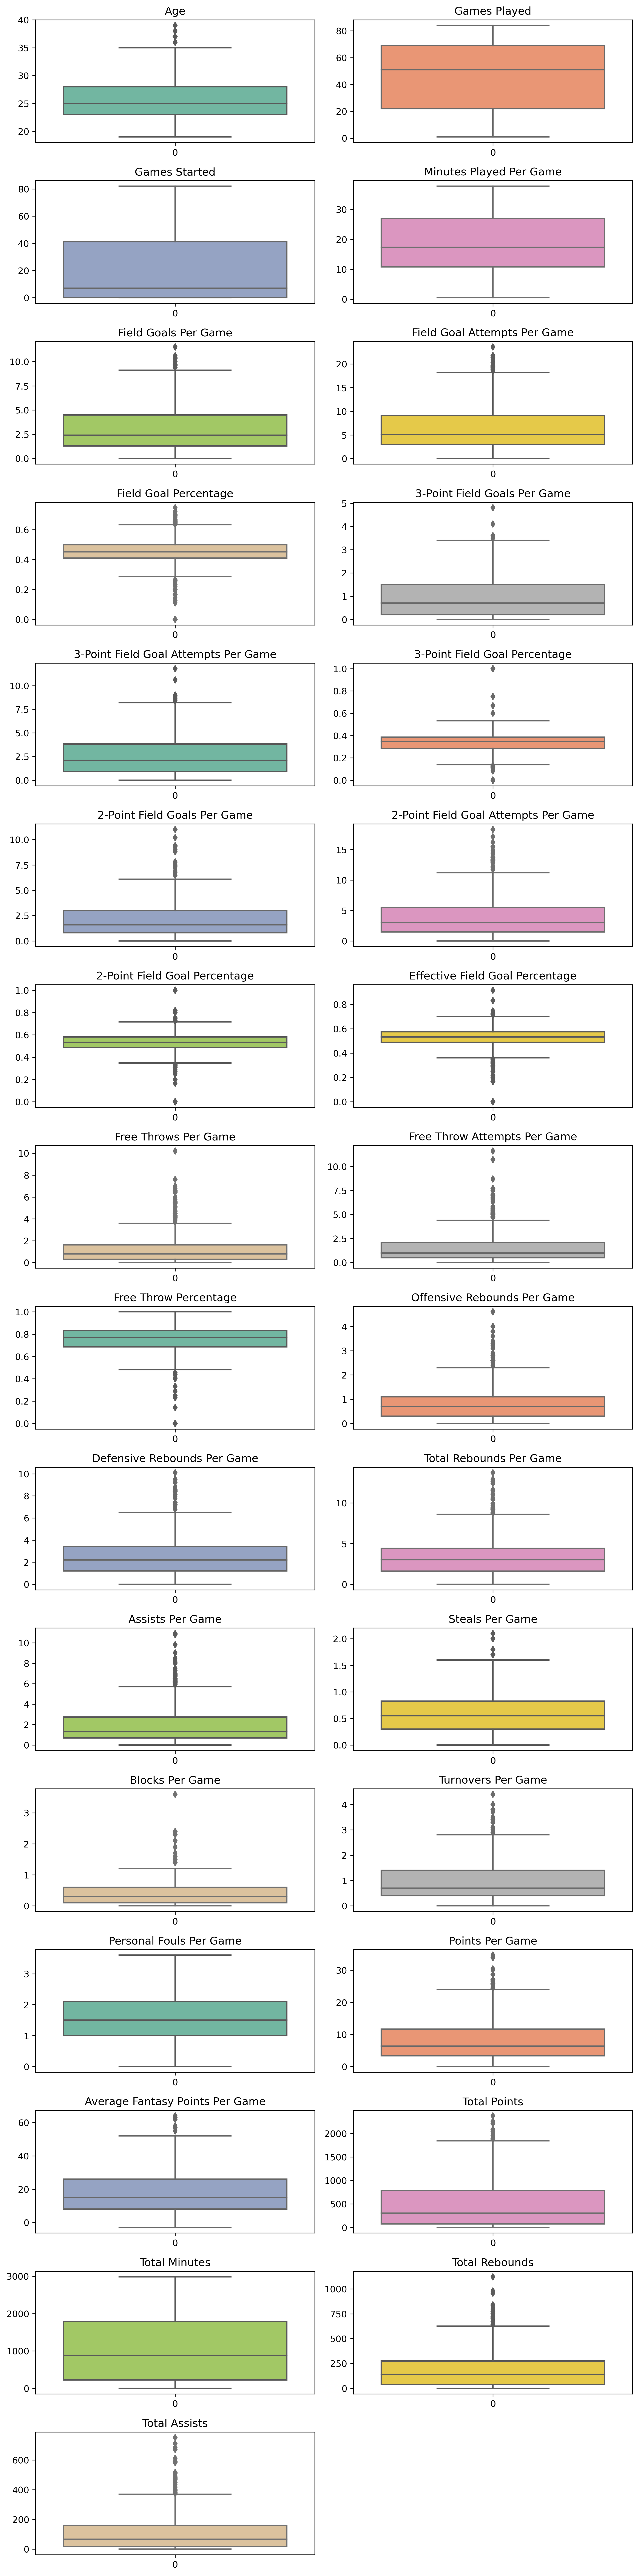

In [26]:
#exclude non-numerical values
column_to_exclude = ['Player', 'Position', 'Team']

all_columns = df_totals.columns

cols = all_columns.drop(column_to_exclude).values

num_cols = len(columns)
num_rows = (num_cols + 1) // 2

colors = sns.color_palette("Set2", num_cols)


fig, axes = plt.subplots(num_rows, 2, figsize=(10, 40),dpi = 300)

#iterate through the subplot and fill each plot
for i, column in enumerate(cols):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df_totals[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'{column}')
    
#gets rid of the empty plot of there is an off number
if num_cols % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()